In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import show
import seaborn as sns
import json
from ast import literal_eval

In [2]:
df = pd.read_csv('train.csv', low_memory=False)

In [146]:
df.tail()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
903648,Social,20170104,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",5123779100307500332,"{""continent"": ""Americas"", ""subContinent"": ""Car...",5123779100307500332_1483554750,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""17"", ""pageviews"": ""15...","{""referralPath"": ""/yt/about/"", ""campaign"": ""(n...",1483554750,1,1483554750
903649,Social,20170104,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",7231728964973959842,"{""continent"": ""Asia"", ""subContinent"": ""Souther...",7231728964973959842_1483543798,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""18"", ""pageviews"": ""13...","{""referralPath"": ""/yt/about/"", ""campaign"": ""(n...",1483543798,1,1483543798
903650,Social,20170104,"{""browser"": ""Android Webview"", ""browserVersion...",5744576632396406899,"{""continent"": ""Asia"", ""subContinent"": ""Eastern...",5744576632396406899_1483526434,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""24"", ""pageviews"": ""21...","{""referralPath"": ""/yt/about/ko/"", ""campaign"": ...",1483526434,1,1483526434
903651,Social,20170104,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",2709355455991750775,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",2709355455991750775_1483592857,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""24"", ""pageviews"": ""22...","{""referralPath"": ""/l.php"", ""campaign"": ""(not s...",1483592857,1,1483592864
903652,Social,20170104,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",0814900163617805053,"{""continent"": ""Americas"", ""subContinent"": ""Cen...",0814900163617805053_1483574474,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""31"", ""pageviews"": ""31...","{""referralPath"": ""/yt/about/es-419/"", ""campaig...",1483574474,1,1483574474


In [4]:
df.shape

(903653, 12)

In [5]:
df.describe(include='all')

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
count,903653,9.036530e+05,903653,903653,903653,903653,903653,903653,903653,9.036530e+05,903653.000000,9.036530e+05
unique,8,NaN,176,714167,39032,902755,1,14840,26061,NaN,NaN,NaN
top,Organic Search,NaN,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1957458976293878100,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",5153197322672733971_1501052136,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",NaN,NaN,NaN
freq,381561,NaN,284522,278,65912,2,903653,362071,297390,NaN,NaN,NaN
mean,NaN,2.016589e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.485007e+09,2.264897,1.485007e+09
std,NaN,4.697698e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.022124e+06,9.283735,9.022124e+06
min,NaN,2.016080e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.470035e+09,1.000000,1.470035e+09
25%,NaN,2.016103e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.477561e+09,1.000000,1.477561e+09
50%,NaN,2.017011e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.483949e+09,1.000000,1.483949e+09
75%,NaN,2.017042e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.492759e+09,1.000000,1.492759e+09


# Find unique values

In [6]:
np.unique(df['channelGrouping'], return_counts=True)

(array(['(Other)', 'Affiliates', 'Direct', 'Display', 'Organic Search',
        'Paid Search', 'Referral', 'Social'], dtype=object),
 array([   120,  16403, 143026,   6262, 381561,  25326, 104838, 226117]))

In [7]:
np.unique(df['socialEngagementType'], return_counts=True)

(array(['Not Socially Engaged'], dtype=object), array([903653]))

In [8]:
np.unique(df['device'], return_counts=True)

(array(['{"browser": "(not set)", "browserVersion": "not available in demo dataset", "browserSize": "not available in demo dataset", "operatingSystem": "(not set)", "operatingSystemVersion": "not available in demo dataset", "isMobile": false, "mobileDeviceBranding": "not available in demo dataset", "mobileDeviceModel": "not available in demo dataset", "mobileInputSelector": "not available in demo dataset", "mobileDeviceInfo": "not available in demo dataset", "mobileDeviceMarketingName": "not available in demo dataset", "flashVersion": "not available in demo dataset", "language": "not available in demo dataset", "screenColors": "not available in demo dataset", "screenResolution": "not available in demo dataset", "deviceCategory": "desktop"}',
        '{"browser": "(not set)", "browserVersion": "not available in demo dataset", "browserSize": "not available in demo dataset", "operatingSystem": "iOS", "operatingSystemVersion": "not available in demo dataset", "isMobile": true, "mobileDevic

In [9]:
geoUniq, geoCount = np.unique(df['geoNetwork'], return_counts=True)

In [10]:
len(geoUniq)

39032

In [11]:
geoUniq[3033]

'{"continent": "Americas", "subContinent": "Northern America", "country": "United States", "region": "(not set)", "metro": "(not set)", "city": "(not set)", "cityId": "not available in demo dataset", "networkDomain": "16clouds.com", "latitude": "not available in demo dataset", "longitude": "not available in demo dataset", "networkLocation": "not available in demo dataset"}'

In [12]:
json.dumps(geoUniq[3033])

'"{\\"continent\\": \\"Americas\\", \\"subContinent\\": \\"Northern America\\", \\"country\\": \\"United States\\", \\"region\\": \\"(not set)\\", \\"metro\\": \\"(not set)\\", \\"city\\": \\"(not set)\\", \\"cityId\\": \\"not available in demo dataset\\", \\"networkDomain\\": \\"16clouds.com\\", \\"latitude\\": \\"not available in demo dataset\\", \\"longitude\\": \\"not available in demo dataset\\", \\"networkLocation\\": \\"not available in demo dataset\\"}"'

In [13]:
literal_eval(geoUniq[3033])

{'city': '(not set)',
 'cityId': 'not available in demo dataset',
 'continent': 'Americas',
 'country': 'United States',
 'latitude': 'not available in demo dataset',
 'longitude': 'not available in demo dataset',
 'metro': '(not set)',
 'networkDomain': '16clouds.com',
 'networkLocation': 'not available in demo dataset',
 'region': '(not set)',
 'subContinent': 'Northern America'}

In [14]:
df.loc[df['fullVisitorId'] == '1957458976293878100',:]

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
921,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",1957458976293878100,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1957458976293878100_1472841771,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""22"", ""pageviews"": ""16""}","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472841771,85,1472841771
1645,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",1957458976293878100,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1957458976293878100_1472821703,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""3"", ""pageviews"": ""3""}","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472821703,83,1472821703
1666,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",1957458976293878100,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1957458976293878100_1472823804,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""5""}","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472823804,84,1472823804
4366,Organic Search,20170126,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",1957458976293878100,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1957458976293878100_1485444781,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""3"", ""pageviews"": ""3""}","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1485444781,178,1485444781
6602,Display,20170623,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",1957458976293878100,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1957458976293878100_1498248064,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""11"", ""pageviews"": ""11""}","{""campaign"": ""(not set)"", ""source"": ""dfa"", ""me...",1498248064,309,1498248064
11005,Organic Search,20160811,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",1957458976293878100,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1957458976293878100_1470934753,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""7"", ""pageviews"": ""4""}","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1470934753,46,1470934753
11357,Organic Search,20160811,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",1957458976293878100,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1957458976293878100_1470931824,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""26"", ""pageviews"": ""18""}","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1470931824,45,1470931824
13567,Display,20170613,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",1957458976293878100,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1957458976293878100_1497373871,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""3"", ""pageviews"": ""3""}","{""campaign"": ""(not set)"", ""source"": ""dfa"", ""me...",1497373871,304,1497373871
19383,Organic Search,20161118,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",1957458976293878100,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1957458976293878100_1479498822,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""3"", ""pageviews"": ""3""}","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1479498822,143,1479498822
19428,Organic Search,20161118,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",1957458976293878100,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1957458976293878100_1479486397,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""4"", ""pageviews"": ""4""}","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1479486397,142,1479486397


In [15]:
type(df['fullVisitorId'][3])

str

In [16]:
df['totals'][30]

'{"visits": "1", "hits": "1", "pageviews": "1", "bounces": "1", "newVisits": "1"}'

In [17]:
df['trafficSource'][0]

'{"campaign": "(not set)", "source": "google", "medium": "organic", "keyword": "(not provided)", "adwordsClickInfo": {"criteriaParameters": "not available in demo dataset"}}'

In [18]:
df['totals'].unique()

array(['{"visits": "1", "hits": "1", "pageviews": "1", "bounces": "1", "newVisits": "1"}',
       '{"visits": "1", "hits": "1", "pageviews": "1", "bounces": "1"}',
       '{"visits": "1", "hits": "2", "pageviews": "2", "newVisits": "1"}',
       ...,
       '{"visits": "1", "hits": "130", "pageviews": "90", "transactionRevenue": "69390000"}',
       '{"visits": "1", "hits": "188", "pageviews": "116"}',
       '{"visits": "1", "hits": "237", "pageviews": "169", "transactionRevenue": "74990000"}'],
      dtype=object)

In [19]:
dftotals = df['totals'].apply(literal_eval)

In [96]:
dftotals.apply(len)

0         5
1         5
2         5
3         5
4         4
5         5
6         5
7         5
8         5
9         5
10        5
11        5
12        5
13        5
14        5
15        5
16        5
17        5
18        5
19        5
20        5
21        5
22        5
23        5
24        5
25        5
26        5
27        5
28        5
29        5
         ..
903623    4
903624    4
903625    4
903626    4
903627    4
903628    4
903629    4
903630    4
903631    4
903632    4
903633    4
903634    4
903635    4
903636    3
903637    4
903638    4
903639    4
903640    4
903641    4
903642    4
903643    3
903644    4
903645    4
903646    4
903647    4
903648    4
903649    4
903650    4
903651    4
903652    4
Name: totals, Length: 903653, dtype: int64

In [54]:
def getrev(inputdict):
    try:
        return inputdict['transactionRevenue']
    except KeyError as e:
        return np.nan

In [55]:
getrev(dftotals[3])

nan

In [56]:
rev = dftotals.apply(getrev)

In [60]:
np.unique(rev.dropna(), return_counts=True)

(array(['10000', '100000000', '100050000', ..., '99970000', '99980000',
        '99990000'], dtype=object), array([ 1, 15,  1, ...,  1,  3, 35]))

In [67]:
rev[rev.notna()].shape

(11515,)

In [87]:
def gettotrev(inputdict):
    try:
        return inputdict['totalTransactionRevenue']
    except KeyError as e:
        return np.nan

In [88]:
trev = dftotals.apply(gettotrev)

In [90]:
np.unique(trev.dropna(), return_counts=True)

(array([], dtype=float64), array([], dtype=int64))

In [68]:
rev[rev.notna()]

752        37860000
753       306670000
799        68030000
802        26250000
859       574150000
866         8380000
893       395730000
910        24080000
922        35480000
925        35080000
930        81500000
942       546320000
971        63840000
974       117340000
976        43710000
999        34480000
1000       35390000
1008      339030000
1020       33670000
1022      635500000
1026      103240000
1027      305470000
1037        5150000
1041       90850000
1054       10590000
1055       25680000
1056      338970000
2774      593910000
3161       44790000
3268       30390000
            ...    
899951     43430000
903089     44790000
903118    175800000
903122     87990000
903167     14370000
903168    155970000
903189     75180000
903194    350000000
903201    135920000
903211    159980000
903222     23180000
903228     22970000
903234    463600000
903235     79990000
903243     76780000
903249     12990000
903256     34970000
903259     91080000
903262     46110000


In [86]:
df['trafficSource'][903234]

'{"referralPath": "/", "campaign": "(not set)", "source": "mall.googleplex.com", "medium": "referral", "adwordsClickInfo": {"criteriaParameters": "not available in demo dataset"}, "isTrueDirect": true}'

In [75]:
df.loc[903317,['totals','trafficSource']]

totals           {"visits": "1", "hits": "237", "pageviews": "1...
trafficSource    {"campaign": "(not set)", "source": "(direct)"...
Name: 903317, dtype: object

In [85]:
df.loc[903234,:]['totals']

'{"visits": "1", "hits": "29", "pageviews": "27", "transactionRevenue": "463600000"}'

In [97]:
np.unique(df['geoNetwork'], return_counts=True)

(array(['{"continent": "(not set)", "subContinent": "(not set)", "country": "(not set)", "region": "(not set)", "metro": "(not set)", "city": "(not set)", "cityId": "not available in demo dataset", "networkDomain": "(not set)", "latitude": "not available in demo dataset", "longitude": "not available in demo dataset", "networkLocation": "not available in demo dataset"}',
        '{"continent": "(not set)", "subContinent": "(not set)", "country": "(not set)", "region": "(not set)", "metro": "(not set)", "city": "(not set)", "cityId": "not available in demo dataset", "networkDomain": "100tb.com", "latitude": "not available in demo dataset", "longitude": "not available in demo dataset", "networkLocation": "not available in demo dataset"}',
        '{"continent": "(not set)", "subContinent": "(not set)", "country": "(not set)", "region": "(not set)", "metro": "(not set)", "city": "(not set)", "cityId": "not available in demo dataset", "networkDomain": "16clouds.com", "latitude": "not availa

In [100]:
unique, count = np.unique(df['trafficSource'], return_counts=True)

In [103]:
unique[]

array(['{"campaign": "(not set)", "source": "(direct)", "medium": "(none)", "adwordsClickInfo": {"criteriaParameters": "not available in demo dataset"}, "isTrueDirect": true}',
       '{"campaign": "(not set)", "source": "(direct)", "medium": "(none)", "adwordsClickInfo": {"criteriaParameters": "not available in demo dataset"}}',
       '{"campaign": "(not set)", "source": "(direct)", "medium": "cpm", "adwordsClickInfo": {"criteriaParameters": "not available in demo dataset"}}',
       ...,
       '{"referralPath": "/zuY3dWqwCI", "campaign": "(not set)", "source": "t.co", "medium": "referral", "adwordsClickInfo": {"criteriaParameters": "not available in demo dataset"}}',
       '{"referralPath": "/zwzp9zSOvd", "campaign": "(not set)", "source": "t.co", "medium": "referral", "adwordsClickInfo": {"criteriaParameters": "not available in demo dataset"}}',
       '{"referralPath": "/~kristiyan/2082_pure_mix/index.html", "campaign": "(not set)", "source": "x20web.corp.google.com", "medium": 

In [108]:
unique[8033]

'{"campaign": "AW - Accessories", "source": "google", "medium": "cpc", "keyword": "google merchandise store", "adContent": "Google Merchandise Collection", "adwordsClickInfo": {"page": "1", "slot": "Top", "criteriaParameters": "not available in demo dataset", "gclId": "Cj0KCQjwja_JBRD8ARIsAHitdbkneYrjXqp5y7MgOxQERR4WWlsbMSGuBxnC-OzmxFGWcbd-6Gzxs40aArndEALw_wcB", "adNetworkType": "Google Search", "isVideoAd": false}}'

In [110]:
unique, count = np.unique(df['totals'], return_counts=True)

In [115]:
unique[12512]

'{"visits": "1", "hits": "62", "pageviews": "46", "transactionRevenue": "82140000", "newVisits": "1"}'

In [116]:
def getqual(inputdict):
    try:
        return inputdict['sessionQualityDim']
    except KeyError as e:
        return np.nan

In [117]:
totqual = dftotals.apply(getqual)

In [118]:
totqual[totqual.notna()]

Series([], Name: totals, dtype: float64)

In [119]:
def getscr(inputdict):
    try:
        return inputdict['screenviews']
    except KeyError as e:
        return np.nan
totscr = dftotals.apply(getscr)
totscr[totscr.notna()]

Series([], Name: totals, dtype: float64)

In [120]:
def gettos(inputdict):
    try:
        return inputdict['timeOnScreen']
    except KeyError as e:
        return np.nan
tottos = dftotals.apply(gettos)
tottos[tottos.notna()]

Series([], Name: totals, dtype: float64)

In [121]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


In [122]:
import datetime

In [128]:
datetime.datetime.strptime('20160902', '%Y%m%d').weekday()

4

In [139]:
df['date'].apply(datetime.datetime.strptime, args=('%Y%m%d',))

TypeError: strptime() argument 1 must be str, not int

In [140]:
type(df['date'][0])

numpy.int64

In [142]:
datetime.datetime.fromtimestamp(1472830385)

datetime.datetime(2016, 9, 2, 8, 33, 5)

In [147]:
df['date'] = df['visitStartTime'].apply(datetime.datetime.fromtimestamp)

In [151]:
df['date'] = df['date'].apply(datetime.datetime.weekday)

In [162]:
df = df.drop(['sessionId', 'socialEngagementType','visitId','visitStartTime'], axis = 1)

/Users/fanggot/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


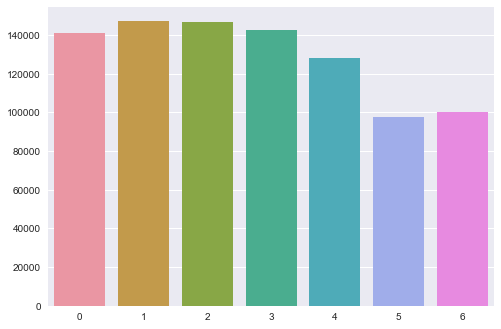

In [168]:
x = df['date'].value_counts()
sns.barplot(x = x.index, y = x.values)
show()

In [169]:
df

,channelGrouping,date,device,fullVisitorId,geoNetwork,totals,trafficSource,visitNumber
0,Organic Search,4,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...","{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1
1,Organic Search,4,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...","{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1
2,Organic Search,4,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...","{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1
3,Organic Search,4,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...","{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1
4,Organic Search,4,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...","{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",2
5,Organic Search,4,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",2938943183656635653,"{""continent"": ""Europe"", ""subContinent"": ""South...","{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1
6,Organic Search,4,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1905672039242460897,"{""continent"": ""Asia"", ""subContinent"": ""Souther...","{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1
7,Organic Search,4,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",537222803633850821,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...","{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1
8,Organic Search,4,"{""browser"": ""Internet Explorer"", ""browserVersi...",4445454811831400414,"{""continent"": ""Europe"", ""subContinent"": ""Weste...","{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1
9,Organic Search,4,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",9499785259412240342,"{""continent"": ""Europe"", ""subContinent"": ""Weste...","{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1


In [171]:
dfdevice = df['geoNetwork'].apply(literal_eval)

In [176]:
def getKeys(tdict, keystr):
    try:
        return tdict[keystr]
    except KeyError as e:
        return 0

In [184]:
df = df.assign( totalsHits = dftotals.apply(getKeys, keystr='hits'))

In [187]:
df = df.assign( totalsVisits = dftotals.apply(getKeys, keystr='visits'))

In [191]:
df = df.drop(['totalsVisits'],axis = 1)

In [195]:
df = df.assign( totalsNew = dftotals.apply(getKeys, keystr='newVisits'))

In [196]:
df['totalsNew'].unique()

array(['1', 0], dtype=object)

In [198]:
df = df.assign( totalsBounces = dftotals.apply(getKeys, keystr='bounces'))

In [199]:
df['totalsBounces'].unique()

array(['1', 0], dtype=object)

In [201]:
df = df.assign( totalsPV = dftotals.apply(getKeys, keystr='pageviews'))

In [204]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,totals,trafficSource,visitNumber,totalsHits,totalsNew,totalsBounces,totalsPV
0,Organic Search,4,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...","{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1,1,1,1,1
1,Organic Search,4,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...","{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1,1,1,1,1
2,Organic Search,4,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...","{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1,1,1,1,1
3,Organic Search,4,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...","{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1,1,1,1,1
4,Organic Search,4,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...","{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",2,1,0,1,1


In [207]:
df = df.assign( totalsTR = dftotals.apply(getKeys, keystr='transactionRevenue'))

In [210]:
df = df.drop(['totals'], axis = 1)

In [211]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,trafficSource,visitNumber,totalsHits,totalsNew,totalsBounces,totalsPV,totalsTR
0,Organic Search,4,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1,1,1,1,1,0
1,Organic Search,4,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1,1,1,1,1,0
2,Organic Search,4,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1,1,1,1,1,0
3,Organic Search,4,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1,1,1,1,1,0
4,Organic Search,4,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",2,1,0,1,1,0


In [259]:
df['totalsTR'] = df['totalsTR'].astype('int')
df['totalsHits'] = df['totalsHits'].astype('int')

In [260]:
hitsVsTR = df.groupby(['totalsHits']).totalsTR.mean()

/Users/fanggot/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


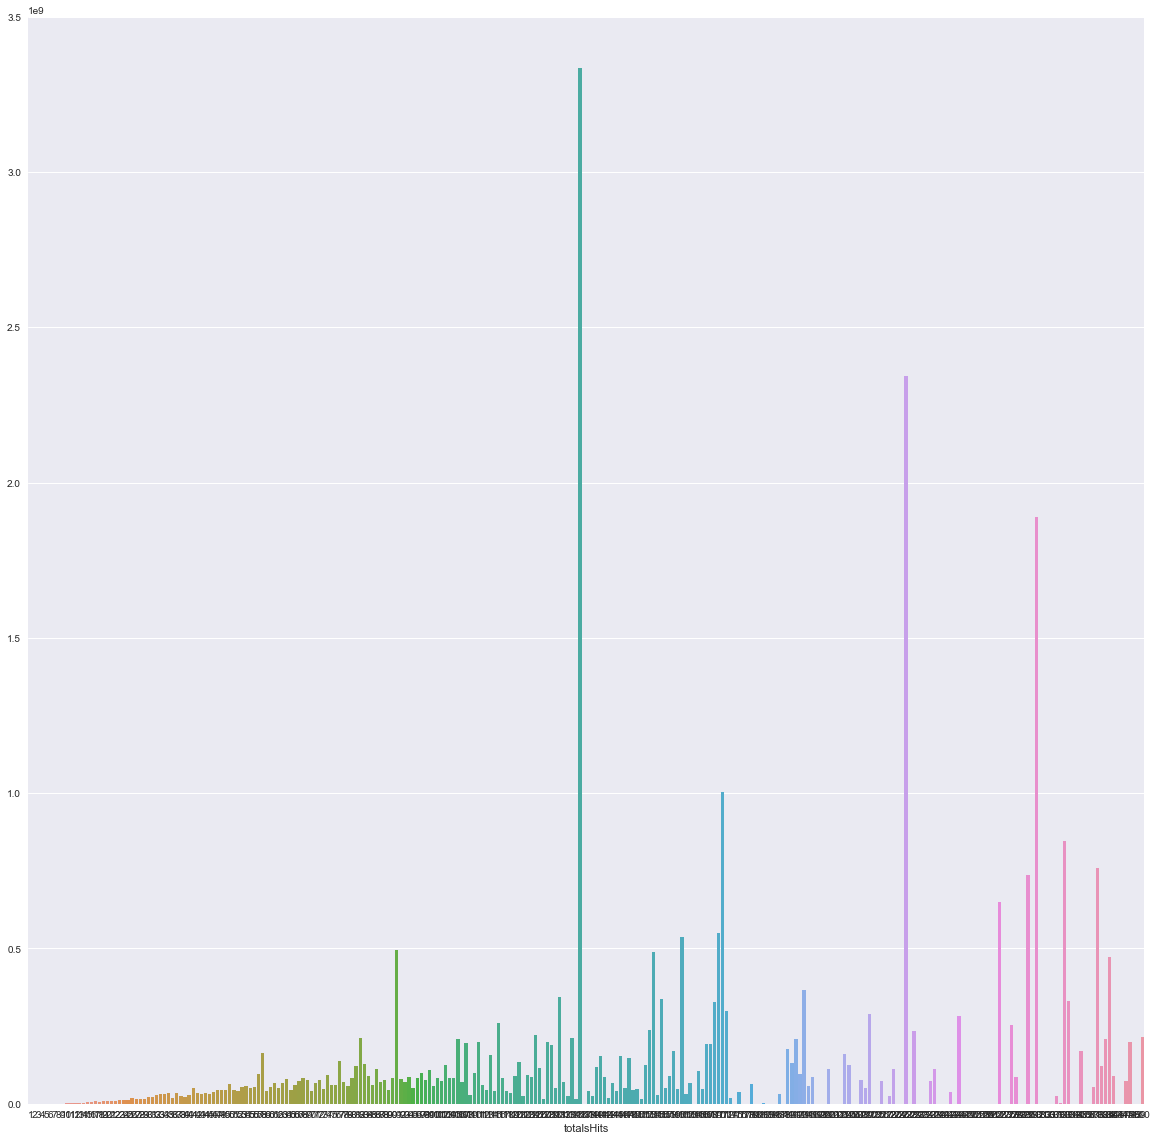

In [261]:
plt.subplots(figsize=(20,20))
sns.barplot(x=hitsVsTR.index, y=hitsVsTR.values)
show()

In [258]:
type(hitsVsTR.index[0])

str